In [1]:
# Read in data and packages
import pandas as pd
import numpy as np
#import bamboolib as bam

df = pd.read_csv('ML1_data_adj_v3.csv')

In [2]:
df1 = df.drop(columns=['Date', 'ticker', 'Fwd_Return_3M', 'Fwd_Return_3M_Class', 'Year'])
df1.describe()

,Fwd_Best_EPS_6M,Mkt_Cap,Best_EPS_1M,Best_EPS_3M,Best_EPS_6M,Best_EPS_1Y,Best_EPS_3Y,Best_EPS_5Y,Best_EPS_3M_v5Y,Best_EPS_6M_v5Y,...,ROIC_SD,ROE,ROE_1Y_Chg,ROE_SD,FCF_Mgn,FCF_Mgn_1Y_Chg,FCF_Mgn_SD,Op_Mgn,Op_Mgn_1Y_Chg,Op_Mgn_SD
count,87462.000000,8.746200e+04,87462.000000,87462.000000,87462.000000,87462.000000,87462.000000,87462.000000,87462.000000,87462.000000,...,87462.000000,87462.000000,87462.000000,87462.000000,87462.000000,87462.000000,87462.000000,87462.000000,87462.000000,87462.000000
mean,0.262499,3.948655e+04,0.227590,0.245508,0.227319,0.174735,0.194395,0.274788,1.956020,2.235959,...,4.279577,20.611482,0.119022,13.786630,14.233412,0.348589,5.556190,18.723264,0.176405,2.478870
std,1.889565,1.238777e+05,2.827431,1.658561,1.441797,0.662165,0.698555,2.545456,108.866027,84.049706,...,11.133445,20.491102,40.061062,45.827671,15.975893,24.322247,17.380424,12.872470,4.867131,3.289648
min,-1.989822,2.285343e+02,-11.533981,-3.961353,-1.989822,-0.995816,-0.331765,-0.199333,-9683.752502,-7607.204848,...,0.102878,-34.297030,-1911.423912,0.131123,-186.202847,-786.589581,0.171153,-3.827139,-83.005348,0.040187
25%,-0.006257,3.718267e+03,0.000000,-0.016667,-0.011628,0.016418,0.053213,0.059330,0.000000,0.000000,...,1.428620,10.026401,-2.506737,2.063806,5.417950,-2.044049,1.711552,8.870344,-1.032860,0.885439
50%,0.116009,9.779620e+03,0.000000,0.072102,0.110954,0.119403,0.130556,0.134222,0.285088,0.493743,...,2.440068,14.537604,0.372151,3.955088,11.440031,0.639573,2.869963,15.729855,0.153245,1.645021
75%,0.343170,2.678470e+04,0.083743,0.345515,0.321878,0.254237,0.229785,0.239723,1.913318,1.802676,...,4.392374,25.078531,4.040793,8.291073,21.817563,3.661002,4.775317,25.869432,1.551535,3.086331
max,258.000000,2.339612e+06,288.385852,97.764706,258.000000,56.500000,46.333333,174.747516,12806.232240,11490.192310,...,267.476144,191.928086,184.928481,804.311314,192.327044,473.918884,315.433750,96.975075,116.773914,55.625080


In [3]:
df2 = df1.sample(frac=0.9, random_state=123)
df2_unseen = df1.drop(df2.index)

In [4]:
df2_unseen.describe()

,Fwd_Best_EPS_6M,Mkt_Cap,Best_EPS_1M,Best_EPS_3M,Best_EPS_6M,Best_EPS_1Y,Best_EPS_3Y,Best_EPS_5Y,Best_EPS_3M_v5Y,Best_EPS_6M_v5Y,...,ROIC_SD,ROE,ROE_1Y_Chg,ROE_SD,FCF_Mgn,FCF_Mgn_1Y_Chg,FCF_Mgn_SD,Op_Mgn,Op_Mgn_1Y_Chg,Op_Mgn_SD
count,8746.000000,8.746000e+03,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,...,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000
mean,0.266303,3.950646e+04,0.222433,0.239388,0.210595,0.172298,0.191822,0.261521,1.388351,1.628594,...,4.396882,20.890486,-0.419615,14.062124,14.164237,0.376367,5.377162,18.824032,0.286681,2.506121
std,1.634375,1.246650e+05,2.389563,1.643973,1.025008,0.494782,0.638416,2.192066,59.196634,53.232537,...,12.627033,21.119280,54.473073,47.295095,15.115589,22.863443,16.899043,12.908070,4.921687,3.441543
min,-1.980676,2.285343e+02,-9.573662,-3.866667,-1.980676,-0.992308,-0.331765,-0.199333,-4194.983642,-2145.478077,...,0.104238,-34.297030,-1911.423912,0.135264,-186.066923,-669.027808,0.192625,-3.827139,-61.437470,0.040187
25%,-0.003514,3.702924e+03,0.000000,-0.019373,-0.017621,0.013856,0.052533,0.057505,0.000000,0.000000,...,1.424688,10.050148,-2.541196,2.102424,5.319537,-2.109991,1.696757,8.861412,-1.032233,0.896135
50%,0.114960,9.786314e+03,0.000000,0.069965,0.105263,0.118644,0.128730,0.131852,0.267669,0.472735,...,2.445180,14.537604,0.372151,4.094318,11.335105,0.571225,2.873979,15.900552,0.153245,1.650239
75%,0.347834,2.728431e+04,0.082862,0.335245,0.319780,0.254980,0.230551,0.240530,1.865226,1.811583,...,4.428478,25.263137,4.153819,8.326593,21.775150,3.651342,4.713522,26.187920,1.690525,3.105210
max,88.000000,2.339612e+06,121.440000,77.157556,38.594106,17.833333,43.000000,174.747516,1187.739464,2286.033520,...,266.783424,191.928086,184.928481,803.864259,189.810606,473.918884,315.433750,96.975075,116.773914,55.394969


In [5]:
from pycaret.regression import *

In [6]:
reg_experiment = setup(df2, target = 'Fwd_Best_EPS_6M', session_id=123, log_experiment=True, experiment_name='Fwd_EPS_6M')

,Description,Value
0,session_id,123
1,Target,Fwd_Best_EPS_6M
2,Original Data,"(78716, 70)"
3,Missing Values,False
4,Numeric Features,61
5,Categorical Features,8
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(55101, 110)"


In [7]:
best_model = compare_models(fold=10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.0971,0.7376,0.5275,0.9255,0.0996,29.1438,84.0330
xgboost,Extreme Gradient Boosting,0.1673,0.6793,0.5514,0.9097,0.1408,114.4222,11.4900
et,Extra Trees Regressor,0.0746,0.8871,0.5608,0.9015,0.0869,20.8437,29.6820
catboost,CatBoost Regressor,0.1736,0.9486,0.6188,0.8996,0.1451,134.6533,12.5400
dt,Decision Tree Regressor,0.1113,0.8128,0.6786,0.8684,0.1420,11.2173,1.7470
gbr,Gradient Boosting Regressor,0.2707,0.9584,0.7507,0.8546,0.2191,192.5179,21.4560
lightgbm,Light Gradient Boosting Machine,0.2404,1.2732,0.8773,0.7970,0.1948,146.4422,0.8180
ada,AdaBoost Regressor,0.6453,1.4946,1.0288,0.6523,0.3818,719.6981,5.3030
br,Bayesian Ridge,0.4530,3.0209,1.5770,0.3278,0.2881,456.2517,1.1180
ridge,Ridge Regression,0.4572,3.0301,1.5831,0.3183,0.2898,473.2754,0.0700


In [8]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0949,0.0790,0.2811,0.9729,0.1010,65.9206
1,0.0974,0.0634,0.2518,0.9835,0.1034,0.8813
2,0.0971,0.0979,0.3129,0.9432,0.1059,136.1744
3,0.1274,6.4653,2.5427,0.6045,0.1009,0.8376
4,0.0940,0.0624,0.2498,0.9816,0.0994,40.4269
5,0.0896,0.0508,0.2254,0.9914,0.0948,11.6933
6,0.0913,0.0768,0.2772,0.9752,0.0985,2.3375
7,0.0996,0.2925,0.5408,0.9065,0.1033,27.3730
8,0.0911,0.1410,0.3754,0.9356,0.0934,4.6668
9,0.0886,0.0474,0.2178,0.9610,0.0953,1.1268


In [9]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

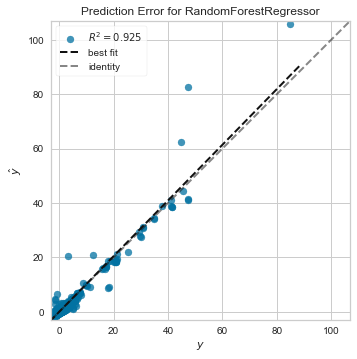

In [10]:
plot_model(rf, plot = 'error')

In [11]:
final_rf = finalize_model(rf)

In [12]:
unseen_predictions = predict_model(final_rf, data=df2_unseen)
unseen_predictions.describe()

,Fwd_Best_EPS_6M,Mkt_Cap,Best_EPS_1M,Best_EPS_3M,Best_EPS_6M,Best_EPS_1Y,Best_EPS_3Y,Best_EPS_5Y,Best_EPS_3M_v5Y,Best_EPS_6M_v5Y,...,ROE,ROE_1Y_Chg,ROE_SD,FCF_Mgn,FCF_Mgn_1Y_Chg,FCF_Mgn_SD,Op_Mgn,Op_Mgn_1Y_Chg,Op_Mgn_SD,Label
count,8746.000000,8.746000e+03,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,...,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000
mean,0.266303,3.950646e+04,0.222433,0.239388,0.210595,0.172298,0.191822,0.261521,1.388351,1.628594,...,20.890486,-0.419615,14.062124,14.164237,0.376367,5.377162,18.824032,0.286681,2.506121,0.268580
std,1.634375,1.246650e+05,2.389563,1.643973,1.025008,0.494782,0.638416,2.192066,59.196634,53.232537,...,21.119280,54.473073,47.295095,15.115589,22.863443,16.899043,12.908070,4.921687,3.441543,1.667628
min,-1.980676,2.285343e+02,-9.573662,-3.866667,-1.980676,-0.992308,-0.331765,-0.199333,-4194.983642,-2145.478077,...,-34.297030,-1911.423912,0.135264,-186.066923,-669.027808,0.192625,-3.827139,-61.437470,0.040187,-1.774953
25%,-0.003514,3.702924e+03,0.000000,-0.019373,-0.017621,0.013856,0.052533,0.057505,0.000000,0.000000,...,10.050148,-2.541196,2.102424,5.319537,-2.109991,1.696757,8.861412,-1.032233,0.896135,0.007750
50%,0.114960,9.786314e+03,0.000000,0.069965,0.105263,0.118644,0.128730,0.131852,0.267669,0.472735,...,14.537604,0.372151,4.094318,11.335105,0.571225,2.873979,15.900552,0.153245,1.650239,0.124787
75%,0.347834,2.728431e+04,0.082862,0.335245,0.319780,0.254980,0.230551,0.240530,1.865226,1.811583,...,25.263137,4.153819,8.326593,21.775150,3.651342,4.713522,26.187920,1.690525,3.105210,0.325367
max,88.000000,2.339612e+06,121.440000,77.157556,38.594106,17.833333,43.000000,174.747516,1187.739464,2286.033520,...,191.928086,184.928481,803.864259,189.810606,473.918884,315.433750,96.975075,116.773914,55.394969,88.000000


In [13]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.Fwd_Best_EPS_6M, unseen_predictions.Label, 'R2')

0.9509

# FWD RETURN 3M MODEL

In [14]:
from pycaret.regression import *

In [15]:
df3 = df.drop(columns=['Date', 'ticker', 'Fwd_Best_EPS_6M', 'Fwd_Return_3M_Class', 'Year'])
df3.describe()

,Fwd_Return_3M,Mkt_Cap,Best_EPS_1M,Best_EPS_3M,Best_EPS_6M,Best_EPS_1Y,Best_EPS_3Y,Best_EPS_5Y,Best_EPS_3M_v5Y,Best_EPS_6M_v5Y,...,ROIC_SD,ROE,ROE_1Y_Chg,ROE_SD,FCF_Mgn,FCF_Mgn_1Y_Chg,FCF_Mgn_SD,Op_Mgn,Op_Mgn_1Y_Chg,Op_Mgn_SD
count,87462.000000,8.746200e+04,87462.000000,87462.000000,87462.000000,87462.000000,87462.000000,87462.000000,87462.000000,87462.000000,...,87462.000000,87462.000000,87462.000000,87462.000000,87462.000000,87462.000000,87462.000000,87462.000000,87462.000000,87462.000000
mean,1.877067,3.948655e+04,0.227590,0.245508,0.227319,0.174735,0.194395,0.274788,1.956020,2.235959,...,4.279577,20.611482,0.119022,13.786630,14.233412,0.348589,5.556190,18.723264,0.176405,2.478870
std,13.453829,1.238777e+05,2.827431,1.658561,1.441797,0.662165,0.698555,2.545456,108.866027,84.049706,...,11.133445,20.491102,40.061062,45.827671,15.975893,24.322247,17.380424,12.872470,4.867131,3.289648
min,-70.666545,2.285343e+02,-11.533981,-3.961353,-1.989822,-0.995816,-0.331765,-0.199333,-9683.752502,-7607.204848,...,0.102878,-34.297030,-1911.423912,0.131123,-186.202847,-786.589581,0.171153,-3.827139,-83.005348,0.040187
25%,-6.426749,3.718267e+03,0.000000,-0.016667,-0.011628,0.016418,0.053213,0.059330,0.000000,0.000000,...,1.428620,10.026401,-2.506737,2.063806,5.417950,-2.044049,1.711552,8.870344,-1.032860,0.885439
50%,1.212353,9.779620e+03,0.000000,0.072102,0.110954,0.119403,0.130556,0.134222,0.285088,0.493743,...,2.440068,14.537604,0.372151,3.955088,11.440031,0.639573,2.869963,15.729855,0.153245,1.645021
75%,8.959660,2.678470e+04,0.083743,0.345515,0.321878,0.254237,0.229785,0.239723,1.913318,1.802676,...,4.392374,25.078531,4.040793,8.291073,21.817563,3.661002,4.775317,25.869432,1.551535,3.086331
max,247.456219,2.339612e+06,288.385852,97.764706,258.000000,56.500000,46.333333,174.747516,12806.232240,11490.192310,...,267.476144,191.928086,184.928481,804.311314,192.327044,473.918884,315.433750,96.975075,116.773914,55.625080


In [16]:
df4 = df3.sample(frac=0.9, random_state=123)
df4_unseen = df3.drop(df4.index)

In [17]:
df4_unseen.describe()

,Fwd_Return_3M,Mkt_Cap,Best_EPS_1M,Best_EPS_3M,Best_EPS_6M,Best_EPS_1Y,Best_EPS_3Y,Best_EPS_5Y,Best_EPS_3M_v5Y,Best_EPS_6M_v5Y,...,ROIC_SD,ROE,ROE_1Y_Chg,ROE_SD,FCF_Mgn,FCF_Mgn_1Y_Chg,FCF_Mgn_SD,Op_Mgn,Op_Mgn_1Y_Chg,Op_Mgn_SD
count,8746.000000,8.746000e+03,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,...,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000
mean,2.099308,3.950646e+04,0.222433,0.239388,0.210595,0.172298,0.191822,0.261521,1.388351,1.628594,...,4.396882,20.890486,-0.419615,14.062124,14.164237,0.376367,5.377162,18.824032,0.286681,2.506121
std,13.851653,1.246650e+05,2.389563,1.643973,1.025008,0.494782,0.638416,2.192066,59.196634,53.232537,...,12.627033,21.119280,54.473073,47.295095,15.115589,22.863443,16.899043,12.908070,4.921687,3.441543
min,-56.537817,2.285343e+02,-9.573662,-3.866667,-1.980676,-0.992308,-0.331765,-0.199333,-4194.983642,-2145.478077,...,0.104238,-34.297030,-1911.423912,0.135264,-186.066923,-669.027808,0.192625,-3.827139,-61.437470,0.040187
25%,-6.328961,3.702924e+03,0.000000,-0.019373,-0.017621,0.013856,0.052533,0.057505,0.000000,0.000000,...,1.424688,10.050148,-2.541196,2.102424,5.319537,-2.109991,1.696757,8.861412,-1.032233,0.896135
50%,1.441962,9.786314e+03,0.000000,0.069965,0.105263,0.118644,0.128730,0.131852,0.267669,0.472735,...,2.445180,14.537604,0.372151,4.094318,11.335105,0.571225,2.873979,15.900552,0.153245,1.650239
75%,9.214585,2.728431e+04,0.082862,0.335245,0.319780,0.254980,0.230551,0.240530,1.865226,1.811583,...,4.428478,25.263137,4.153819,8.326593,21.775150,3.651342,4.713522,26.187920,1.690525,3.105210
max,205.257881,2.339612e+06,121.440000,77.157556,38.594106,17.833333,43.000000,174.747516,1187.739464,2286.033520,...,266.783424,191.928086,184.928481,803.864259,189.810606,473.918884,315.433750,96.975075,116.773914,55.394969


In [18]:
reg_experiment = setup(df4, target = 'Fwd_Return_3M', session_id=123, log_experiment=True, experiment_name='Fwd_Return_3M')

,Description,Value
0,session_id,123
1,Target,Fwd_Return_3M
2,Original Data,"(78716, 70)"
3,Missing Values,False
4,Numeric Features,61
5,Categorical Features,8
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(55101, 110)"


In [19]:
best_model = compare_models(fold=10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,3.9228,34.5693,5.8775,0.8079,0.6398,3.5143,29.3120
rf,Random Forest Regressor,4.3051,39.1998,6.2586,0.7822,0.6668,3.3292,75.4550
xgboost,Extreme Gradient Boosting,6.7556,79.8609,8.9352,0.5560,0.9839,3.7963,11.9090
catboost,CatBoost Regressor,6.7867,80.1372,8.9510,0.5545,0.9922,3.8349,11.6520
dt,Decision Tree Regressor,5.9561,88.6239,9.4096,0.5070,0.7759,5.8136,1.4700
lightgbm,Light Gradient Boosting Machine,8.3294,119.3071,10.9216,0.3367,1.2811,2.8582,0.7390
gbr,Gradient Boosting Regressor,9.4168,156.1804,12.4958,0.1318,1.4405,2.7557,21.4920
knn,K Neighbors Regressor,9.6885,172.2641,13.1239,0.0422,1.1420,5.4766,0.9600
ridge,Ridge Regression,9.7700,173.7901,13.1808,0.0342,1.3971,4.3804,0.0560
br,Bayesian Ridge,9.7711,173.7874,13.1807,0.0342,1.3992,4.3933,1.0010


In [20]:
et2 = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.9398,33.6976,5.8050,0.8120,0.6379,1.7240
1,3.9359,35.3553,5.9460,0.8043,0.6363,1.2849
2,3.9514,34.4899,5.8728,0.8056,0.6486,4.2677
3,3.8870,36.4070,6.0338,0.8006,0.6344,2.1139
4,3.8790,32.5526,5.7055,0.8154,0.6325,2.4778
5,3.9623,33.9719,5.8285,0.8195,0.6347,11.9282
6,4.0466,36.2721,6.0226,0.7991,0.6553,4.0756
7,3.9764,38.0126,6.1654,0.8016,0.6458,1.7711
8,3.7512,31.7847,5.6378,0.8168,0.6330,2.8891
9,3.8985,33.1493,5.7575,0.8040,0.6397,2.6109


In [21]:
evaluate_model(et2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

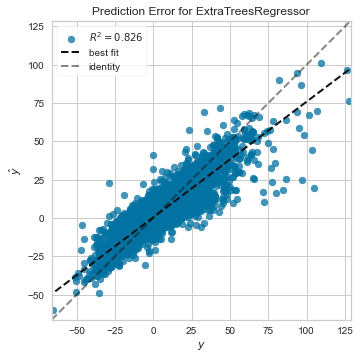

In [22]:
plot_model(et2, plot = 'error')

In [23]:
final_et2 = finalize_model(et2)

In [24]:
unseen_predictions2 = predict_model(final_et2, data=df4_unseen)
unseen_predictions2.head()

,Fwd_Return_3M,Mkt_Cap,Sector,Best_EPS_1M,Best_EPS_3M,Best_EPS_6M,Best_EPS_1Y,Best_EPS_3Y,Best_EPS_5Y,Best_EPS_3M_v5Y,...,ROE,ROE_1Y_Chg,ROE_SD,FCF_Mgn,FCF_Mgn_1Y_Chg,FCF_Mgn_SD,Op_Mgn,Op_Mgn_1Y_Chg,Op_Mgn_SD,Label
0,19.648291,608683.060,Information Technology,0.000000,0.348247,0.179922,-0.076528,0.146629,0.163758,2.126587,...,36.903281,-9.344911,5.867324,24.352012,-5.922154,2.692903,26.634970,-2.173891,2.801545,16.092854
4,-2.742207,57585.734,Information Technology,-0.024948,1.217391,1.057325,1.285714,0.860697,0.266019,4.576325,...,13.817964,-0.393440,2.217123,21.537960,0.863383,2.736311,25.187357,7.669042,2.873189,-7.320128
17,14.471270,53240.710,Communication Services,0.000000,1.714286,0.962963,0.904762,0.198481,-0.063081,0.000000,...,7.614497,-9.106061,16.590428,-17.910727,-8.020193,6.621322,4.300841,-0.527331,2.472311,6.743041
37,-3.499138,61470.316,Financials,0.000000,0.002288,-0.037062,-0.024255,0.067912,0.124344,0.018401,...,11.013698,-1.225741,1.258044,22.462087,-9.357688,3.460152,40.561996,0.204354,1.578906,1.697530
47,16.488885,72113.020,Consumer Discretionary,-0.000056,-0.227684,-0.089563,0.115366,0.187252,0.356380,-0.638879,...,22.937598,-8.358432,7.344076,34.485767,3.495085,1.796763,35.809464,0.727352,1.152032,12.859161


In [25]:
from pycaret.utils import check_metric
check_metric(unseen_predictions2.Fwd_Return_3M, unseen_predictions2.Label, 'R2')

0.8635

# FWD_RETURN_3M_CLASS MODEL

In [26]:
df5 = df.drop(columns=['Date', 'ticker', 'Fwd_Best_EPS_6M', 'Fwd_Return_3M', 'Year'])
df5.describe()

,Fwd_Return_3M_Class,Mkt_Cap,Best_EPS_1M,Best_EPS_3M,Best_EPS_6M,Best_EPS_1Y,Best_EPS_3Y,Best_EPS_5Y,Best_EPS_3M_v5Y,Best_EPS_6M_v5Y,...,ROIC_SD,ROE,ROE_1Y_Chg,ROE_SD,FCF_Mgn,FCF_Mgn_1Y_Chg,FCF_Mgn_SD,Op_Mgn,Op_Mgn_1Y_Chg,Op_Mgn_SD
count,87462.000000,8.746200e+04,87462.000000,87462.000000,87462.000000,87462.000000,87462.000000,87462.000000,87462.000000,87462.000000,...,87462.000000,87462.000000,87462.000000,87462.000000,87462.000000,87462.000000,87462.000000,87462.000000,87462.000000,87462.000000
mean,0.543516,3.948655e+04,0.227590,0.245508,0.227319,0.174735,0.194395,0.274788,1.956020,2.235959,...,4.279577,20.611482,0.119022,13.786630,14.233412,0.348589,5.556190,18.723264,0.176405,2.478870
std,0.498106,1.238777e+05,2.827431,1.658561,1.441797,0.662165,0.698555,2.545456,108.866027,84.049706,...,11.133445,20.491102,40.061062,45.827671,15.975893,24.322247,17.380424,12.872470,4.867131,3.289648
min,0.000000,2.285343e+02,-11.533981,-3.961353,-1.989822,-0.995816,-0.331765,-0.199333,-9683.752502,-7607.204848,...,0.102878,-34.297030,-1911.423912,0.131123,-186.202847,-786.589581,0.171153,-3.827139,-83.005348,0.040187
25%,0.000000,3.718267e+03,0.000000,-0.016667,-0.011628,0.016418,0.053213,0.059330,0.000000,0.000000,...,1.428620,10.026401,-2.506737,2.063806,5.417950,-2.044049,1.711552,8.870344,-1.032860,0.885439
50%,1.000000,9.779620e+03,0.000000,0.072102,0.110954,0.119403,0.130556,0.134222,0.285088,0.493743,...,2.440068,14.537604,0.372151,3.955088,11.440031,0.639573,2.869963,15.729855,0.153245,1.645021
75%,1.000000,2.678470e+04,0.083743,0.345515,0.321878,0.254237,0.229785,0.239723,1.913318,1.802676,...,4.392374,25.078531,4.040793,8.291073,21.817563,3.661002,4.775317,25.869432,1.551535,3.086331
max,1.000000,2.339612e+06,288.385852,97.764706,258.000000,56.500000,46.333333,174.747516,12806.232240,11490.192310,...,267.476144,191.928086,184.928481,804.311314,192.327044,473.918884,315.433750,96.975075,116.773914,55.625080


In [27]:
df6 = df5.sample(frac=0.9, random_state=123)
df6_unseen = df5.drop(df6.index)

In [28]:
df6_unseen.describe()

,Fwd_Return_3M_Class,Mkt_Cap,Best_EPS_1M,Best_EPS_3M,Best_EPS_6M,Best_EPS_1Y,Best_EPS_3Y,Best_EPS_5Y,Best_EPS_3M_v5Y,Best_EPS_6M_v5Y,...,ROIC_SD,ROE,ROE_1Y_Chg,ROE_SD,FCF_Mgn,FCF_Mgn_1Y_Chg,FCF_Mgn_SD,Op_Mgn,Op_Mgn_1Y_Chg,Op_Mgn_SD
count,8746.000000,8.746000e+03,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,...,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000,8746.000000
mean,0.550995,3.950646e+04,0.222433,0.239388,0.210595,0.172298,0.191822,0.261521,1.388351,1.628594,...,4.396882,20.890486,-0.419615,14.062124,14.164237,0.376367,5.377162,18.824032,0.286681,2.506121
std,0.497421,1.246650e+05,2.389563,1.643973,1.025008,0.494782,0.638416,2.192066,59.196634,53.232537,...,12.627033,21.119280,54.473073,47.295095,15.115589,22.863443,16.899043,12.908070,4.921687,3.441543
min,0.000000,2.285343e+02,-9.573662,-3.866667,-1.980676,-0.992308,-0.331765,-0.199333,-4194.983642,-2145.478077,...,0.104238,-34.297030,-1911.423912,0.135264,-186.066923,-669.027808,0.192625,-3.827139,-61.437470,0.040187
25%,0.000000,3.702924e+03,0.000000,-0.019373,-0.017621,0.013856,0.052533,0.057505,0.000000,0.000000,...,1.424688,10.050148,-2.541196,2.102424,5.319537,-2.109991,1.696757,8.861412,-1.032233,0.896135
50%,1.000000,9.786314e+03,0.000000,0.069965,0.105263,0.118644,0.128730,0.131852,0.267669,0.472735,...,2.445180,14.537604,0.372151,4.094318,11.335105,0.571225,2.873979,15.900552,0.153245,1.650239
75%,1.000000,2.728431e+04,0.082862,0.335245,0.319780,0.254980,0.230551,0.240530,1.865226,1.811583,...,4.428478,25.263137,4.153819,8.326593,21.775150,3.651342,4.713522,26.187920,1.690525,3.105210
max,1.000000,2.339612e+06,121.440000,77.157556,38.594106,17.833333,43.000000,174.747516,1187.739464,2286.033520,...,266.783424,191.928086,184.928481,803.864259,189.810606,473.918884,315.433750,96.975075,116.773914,55.394969


In [29]:
from pycaret.classification import *

In [30]:
reg_experiment = setup(df6, target = 'Fwd_Return_3M_Class', session_id=123, log_experiment=True, experiment_name='Fwd_Return_3M_Class')

,Description,Value
0,session_id,123
1,Target,Fwd_Return_3M_Class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(78716, 70)"
5,Missing Values,False
6,Numeric Features,61
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


In [31]:
best_model = compare_models(fold=10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8709,0.9343,0.8854,0.8772,0.8813,0.7398,0.7399,5.3580
et,Extra Trees Classifier,0.8650,0.9252,0.8788,0.8726,0.8757,0.7280,0.7280,3.8600
dt,Decision Tree Classifier,0.8060,0.8048,0.8202,0.8211,0.8207,0.6095,0.6095,1.1600
catboost,CatBoost Classifier,0.8021,0.8798,0.8577,0.7934,0.8243,0.5987,0.6011,13.5970
xgboost,Extreme Gradient Boosting,0.7967,0.8743,0.8432,0.7939,0.8178,0.5883,0.5898,12.1570
lightgbm,Light Gradient Boosting Machine,0.7406,0.8197,0.8418,0.7238,0.7783,0.4699,0.4778,0.9250
gbc,Gradient Boosting Classifier,0.6247,0.6795,0.8271,0.6137,0.7046,0.2201,0.2392,21.8070
knn,K Neighbors Classifier,0.5911,0.6189,0.6535,0.6149,0.6336,0.1720,0.1724,1.2690
ada,Ada Boost Classifier,0.5777,0.6016,0.7279,0.5888,0.6510,0.1313,0.1361,3.8030
lda,Linear Discriminant Analysis,0.5635,0.5804,0.7506,0.5739,0.6504,0.0962,0.1024,1.1540


In [32]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8694,0.9356,0.8863,0.8740,0.8801,0.7366,0.7367
1,0.8701,0.9382,0.8830,0.8777,0.8803,0.7382,0.7382
2,0.8739,0.9365,0.8826,0.8841,0.8834,0.7460,0.7460
3,0.8615,0.9247,0.8759,0.8692,0.8725,0.7210,0.7210
4,0.8730,0.9385,0.8866,0.8795,0.8831,0.7440,0.7440
5,0.8711,0.9322,0.8826,0.8796,0.8811,0.7405,0.7405
6,0.8730,0.9339,0.8896,0.8773,0.8834,0.7439,0.7440
7,0.8675,0.9324,0.8886,0.8694,0.8789,0.7327,0.7329
8,0.8779,0.9391,0.8856,0.8883,0.8869,0.7541,0.7541
9,0.8719,0.9323,0.8927,0.8733,0.8829,0.7415,0.7417


In [33]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

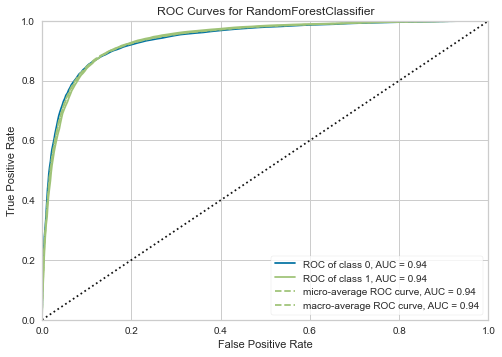

In [34]:
plot_model(rf)

In [35]:
final_rf = finalize_model(rf)

In [36]:
unseen_predictions3 = predict_model(final_rf, data=df6_unseen)
unseen_predictions3.head()

,Fwd_Return_3M_Class,Mkt_Cap,Sector,Best_EPS_1M,Best_EPS_3M,Best_EPS_6M,Best_EPS_1Y,Best_EPS_3Y,Best_EPS_5Y,Best_EPS_3M_v5Y,...,ROE_1Y_Chg,ROE_SD,FCF_Mgn,FCF_Mgn_1Y_Chg,FCF_Mgn_SD,Op_Mgn,Op_Mgn_1Y_Chg,Op_Mgn_SD,Label,Score
0,1,608683.060,Information Technology,0.000000,0.348247,0.179922,-0.076528,0.146629,0.163758,2.126587,...,-9.344911,5.867324,24.352012,-5.922154,2.692903,26.634970,-2.173891,2.801545,1,0.89
4,0,57585.734,Information Technology,-0.024948,1.217391,1.057325,1.285714,0.860697,0.266019,4.576325,...,-0.393440,2.217123,21.537960,0.863383,2.736311,25.187357,7.669042,2.873189,0,0.95
17,1,53240.710,Communication Services,0.000000,1.714286,0.962963,0.904762,0.198481,-0.063081,0.000000,...,-9.106061,16.590428,-17.910727,-8.020193,6.621322,4.300841,-0.527331,2.472311,1,0.58
37,0,61470.316,Financials,0.000000,0.002288,-0.037062,-0.024255,0.067912,0.124344,0.018401,...,-1.225741,1.258044,22.462087,-9.357688,3.460152,40.561996,0.204354,1.578906,1,0.54
47,1,72113.020,Consumer Discretionary,-0.000056,-0.227684,-0.089563,0.115366,0.187252,0.356380,-0.638879,...,-8.358432,7.344076,34.485767,3.495085,1.796763,35.809464,0.727352,1.152032,1,0.81


In [37]:
from pycaret.utils import check_metric
check_metric(unseen_predictions3.Fwd_Return_3M_Class, unseen_predictions3.Label, 'Accuracy')

0.8968

In [ ]:
# plot model (without plot kwargs)
plot_model(rf, plot = 'confusion_matrix') 


In [ ]:
# plot model (with plot kwargs)
plot_model(rf, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})